### Import the Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Inspecting a single file

In [2]:
#single_file - 1 second vibration signal
single_file = pd.read_csv('D:/Springboard/Capstone_Works/Project/Proj_DataSet/2nd_test/2004.02.12.10.32.39',sep='\t')

In [3]:
# Insert Column headers 
single_file.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']

In [4]:
# Describing the stats of single_file - 1 second vibration signal
single_file.describe()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,20479.000000,20479.000000,20479.000000,20479.000000
mean,-0.010194,-0.012692,-0.014535,-0.010026
std,0.073478,0.090057,0.108436,0.053169
min,-0.386000,-0.513000,-0.911000,-0.264000
25%,-0.059000,-0.073000,-0.081000,-0.046000
50%,-0.010000,-0.015000,-0.015000,-0.010000
75%,0.037000,0.046000,0.051000,0.027000
max,0.454000,0.464000,1.023000,0.193000


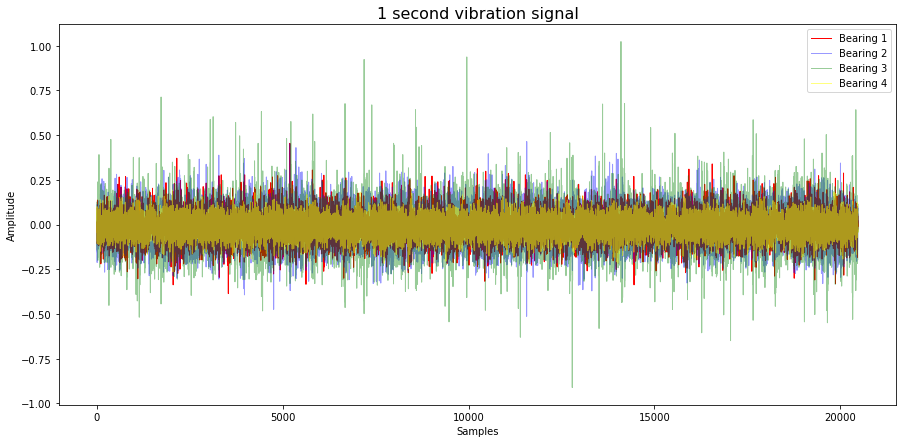

In [5]:
# Plot of single_file - 1 second vibration signal
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(single_file['Bearing 1'], label='Bearing 1', color='red', linewidth=1,alpha=1)
ax.plot(single_file['Bearing 2'], label='Bearing 2', color='blue', linewidth=1,alpha=0.4)
ax.plot(single_file['Bearing 3'], label='Bearing 3', color='green', linewidth=1,alpha=0.4)
ax.plot(single_file['Bearing 4'], label='Bearing 4', color='yellow', linewidth=1,alpha=0.5)
plt.legend(loc='best')
plt.xlabel('Samples')
plt.ylabel("Amplitude")
ax.set_title('1 second vibration signal', fontsize=16)
plt.show()

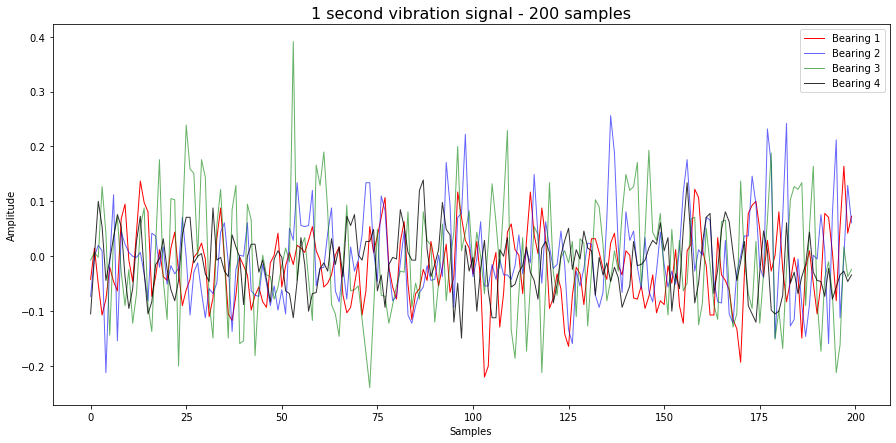

In [6]:
# Plot of single_file - 1 second vibration signal - first 200 samples
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(single_file['Bearing 1'][0:200], label='Bearing 1', color='red', linewidth=1)
ax.plot(single_file['Bearing 2'][0:200], label='Bearing 2', color='blue', linewidth=1,alpha=0.6)
ax.plot(single_file['Bearing 3'][0:200], label='Bearing 3', color='green', linewidth=1,alpha=0.6)
ax.plot(single_file['Bearing 4'][0:200], label='Bearing 4', color='black', linewidth=1,alpha=0.8)
plt.legend(loc='best')
plt.xlabel('Samples')
plt.ylabel("Amplitude")
ax.set_title('1 second vibration signal - 200 samples', fontsize=16)
plt.show()

## Load and combine the Dataset

In [7]:
# Create the blank dataframe
combined_data = pd.DataFrame()

# Set the file directory
data_dir = 'D:/Springboard/Capstone_Works/Project/Proj_DataSet/2nd_test'

# Iterate through all the files
for file_name in os.listdir(data_dir):
    df = pd.read_csv(os.path.join(data_dir, file_name), sep='\t')
    
    # To get the absolute mean value of each file
    df_mean_abs = np.array(df.abs().mean())
    df_mean_abs = pd.DataFrame(df_mean_abs.reshape(1,4))
    
    # Set the index as date_time, which is the name of the file
    df_mean_abs.index = [file_name]
    
    # Append individual dataframes to create a single combined dataset
    combined_data = combined_data.append(df_mean_abs)
    
# Insert Column headers    
combined_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']

In [8]:
# Printing the combined_data
print(combined_data.head(5))
print(combined_data.shape)

                     Bearing 1  Bearing 2  Bearing 3  Bearing 4
2004.02.12.10.32.39   0.058333   0.071832   0.083242   0.043067
2004.02.12.10.42.39   0.058995   0.074006   0.084435   0.044541
2004.02.12.10.52.39   0.060236   0.074227   0.083926   0.044443
2004.02.12.11.02.39   0.061455   0.073844   0.084457   0.045081
2004.02.12.11.12.39   0.061361   0.075609   0.082837   0.045118
(984, 4)


### Sort the dataset with data_time as index

In [9]:
# Set the data_time index and ensuring the proper format
combined_data.index = pd.to_datetime(combined_data.index, format='%Y.%m.%d.%H.%M.%S')

# Sort the index in chronological order
combined_data = combined_data.sort_index()

# Saving the dataset as csv file
combined_data.to_csv('Combined_Averaged_Dataset_2nd_Test.csv')

# Printing the combined_data
print(combined_data.head(5))
print(combined_data.shape)

                     Bearing 1  Bearing 2  Bearing 3  Bearing 4
2004-02-12 10:32:39   0.058333   0.071832   0.083242   0.043067
2004-02-12 10:42:39   0.058995   0.074006   0.084435   0.044541
2004-02-12 10:52:39   0.060236   0.074227   0.083926   0.044443
2004-02-12 11:02:39   0.061455   0.073844   0.084457   0.045081
2004-02-12 11:12:39   0.061361   0.075609   0.082837   0.045118
(984, 4)


## Visualizing the data

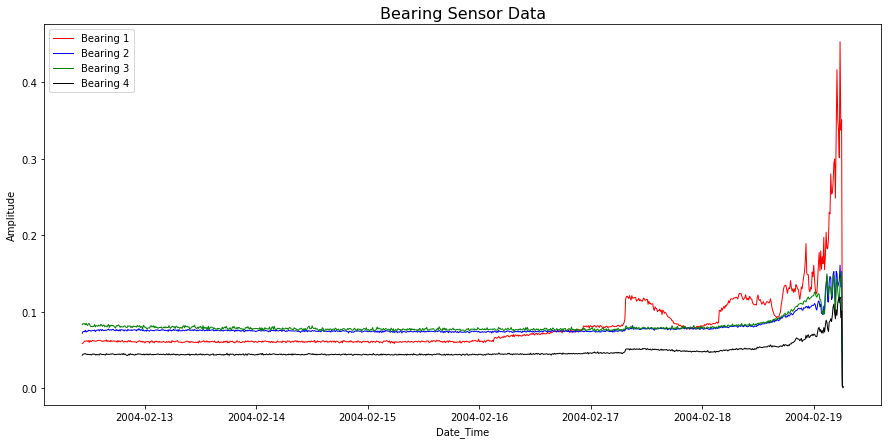

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(combined_data['Bearing 1'], label='Bearing 1', color='red',linewidth=1)
ax.plot(combined_data['Bearing 2'], label='Bearing 2', color='blue', linewidth=1)
ax.plot(combined_data['Bearing 3'], label='Bearing 3', color='green', linewidth=1)
ax.plot(combined_data['Bearing 4'], label='Bearing 4', color='black', linewidth=1)
plt.xlabel('Date_Time')
plt.ylabel("Amplitude")
plt.legend(loc='best')
ax.set_title('Bearing Sensor Data', fontsize=16)
plt.show()

### New Dataframe for EDA with time_steps (Samples) as index

In [11]:
new_comb_data = combined_data

In [12]:
new_comb_data['time_steps'] = np.arange(0,len(combined_data))

In [13]:
new_comb_data.index = new_comb_data['time_steps']
new_comb_data.drop(['time_steps'],axis=1,inplace=True)

In [14]:
new_comb_data.head(5)

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
time_steps,,,,
0,0.058333,0.071832,0.083242,0.043067
1,0.058995,0.074006,0.084435,0.044541
2,0.060236,0.074227,0.083926,0.044443
3,0.061455,0.073844,0.084457,0.045081
4,0.061361,0.075609,0.082837,0.045118


### Visualize the dataset with samples as index

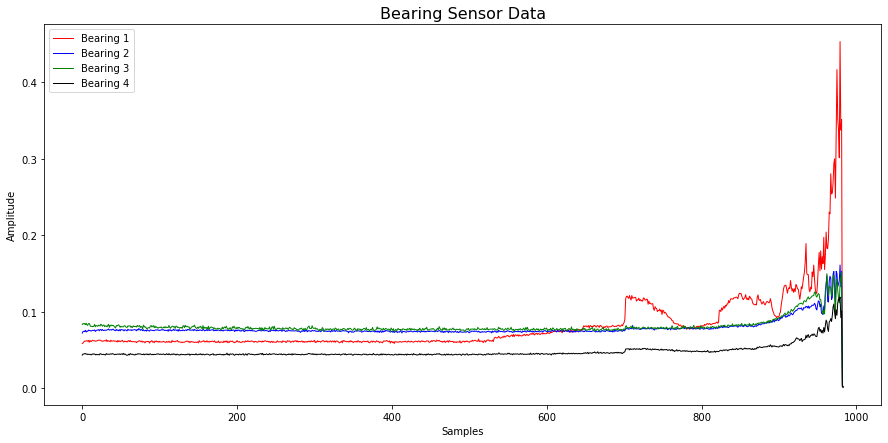

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(new_comb_data['Bearing 1'], label='Bearing 1', color='red',linewidth=1)
ax.plot(new_comb_data['Bearing 2'], label='Bearing 2', color='blue', linewidth=1)
ax.plot(new_comb_data['Bearing 3'], label='Bearing 3', color='green', linewidth=1)
ax.plot(new_comb_data['Bearing 4'], label='Bearing 4', color='black', linewidth=1)
plt.xlabel('Samples')
plt.ylabel("Amplitude")
plt.legend(loc='best')
ax.set_title('Bearing Sensor Data', fontsize=16)
plt.show()

## Split the dataset into normal and abnormal data

In [16]:
normal_data = new_comb_data[0:530]
abnormal_data = new_comb_data[530:-2]

### Visualizing Normal Range

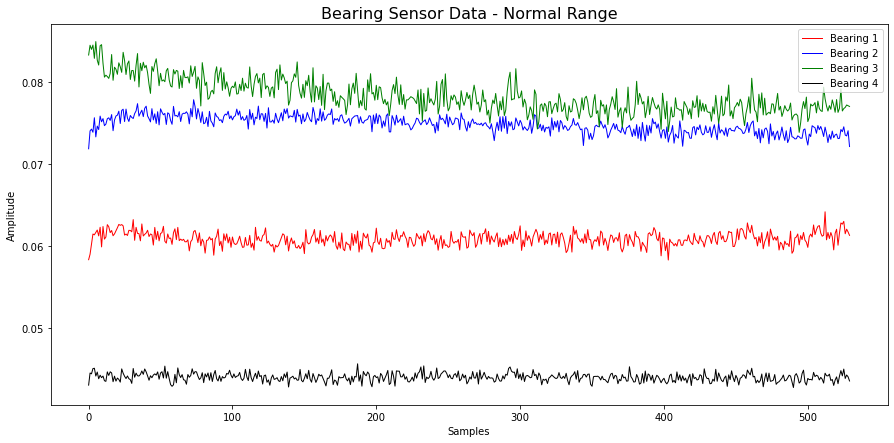

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(normal_data['Bearing 1'], label='Bearing 1', color='red',linewidth=1)
ax.plot(normal_data['Bearing 2'], label='Bearing 2', color='blue', linewidth=1)
ax.plot(normal_data['Bearing 3'], label='Bearing 3', color='green', linewidth=1)
ax.plot(normal_data['Bearing 4'], label='Bearing 4', color='black', linewidth=1)
plt.xlabel('Samples')
plt.ylabel("Amplitude")
plt.legend(loc='best')
ax.set_title('Bearing Sensor Data - Normal Range', fontsize=16)
plt.show()

### Visualizing Abnormal Range

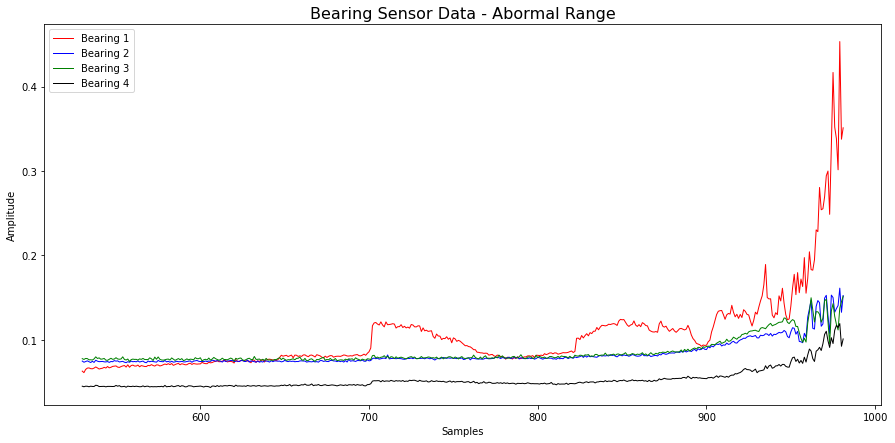

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(abnormal_data['Bearing 1'], label='Bearing 1', color='red',linewidth=1)
ax.plot(abnormal_data['Bearing 2'], label='Bearing 2', color='blue', linewidth=1)
ax.plot(abnormal_data['Bearing 3'], label='Bearing 3', color='green', linewidth=1)
ax.plot(abnormal_data['Bearing 4'], label='Bearing 4', color='black', linewidth=1)
plt.xlabel('Samples')
plt.ylabel("Amplitude")
plt.legend(loc='best')
ax.set_title('Bearing Sensor Data - Abormal Range', fontsize=16)
plt.show()